<a href="https://colab.research.google.com/github/IrinaSh96/Data-Scientist/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pandas import *
import numpy as np
import scipy.stats as stats
import statsmodels.stats.api as sms
import seaborn as sns
from math import ceil

In [ ]:
df = read_csv("/content/drive/MyDrive/data/ab_test_results_aggregated_views_clicks_2.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  120000 non-null  int64  
 1   group    120000 non-null  object 
 2   views    120000 non-null  float64
 3   clicks   120000 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


количество строчек каждой колонки соответсвует общему количеству строчек

в датасете 4 колонки: 1-я ID пользователя, 2-я групы, 3-я количество просмотров, 5-я количество кликов

Проверка на параметры просмотров и кликов


In [ ]:
df.describe()

,user_id,views,clicks
count,120000.000000,120000.000000,120000.000000
mean,60000.500000,4.991075,0.182692
std,34641.160489,5.915200,0.472547
min,1.000000,1.000000,0.000000
25%,30000.750000,2.000000,0.000000
50%,60000.500000,3.000000,0.000000
75%,90000.250000,6.000000,0.000000
max,120000.000000,205.000000,9.000000


In [ ]:
print(df.nunique())

user_id    120000
group           2
views         111
clicks         10
dtype: int64


<Axes: ylabel='group'>

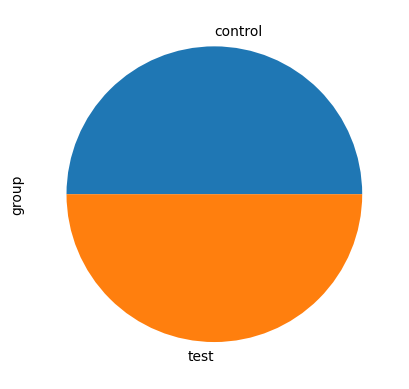

In [ ]:
#имеются две равнозначные группы
df['group'].value_counts(normalize=True).plot.pie()

In [ ]:
#Ожидание зависимость clicks/views увелисится, views не уменьшится, clicks Если clicks/views увеличивается, то и количество clicks должно увеличиваться в тстовой группе

In [ ]:
#Проверка несоответствия соотношения выборок
df.groupby('group')['user_id'].nunique()

group
control    60000
test       60000
Name: user_id, dtype: int64

##количество кликов##

<Axes: ylabel='Density'>

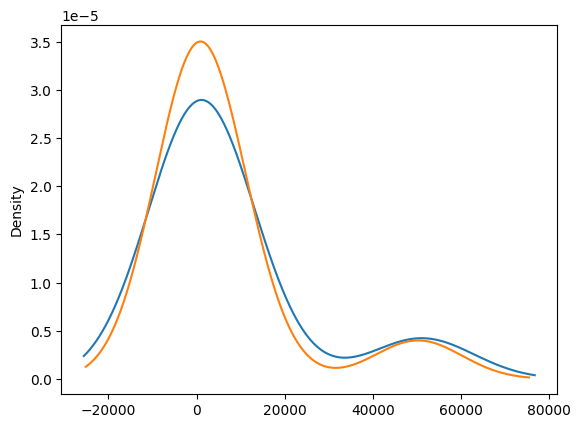

In [ ]:
df[df['group']=='control']['clicks'].value_counts().plot.density()
df[df['group']=='test']['clicks'].value_counts().plot.density()


<Axes: xlabel='clicks', ylabel='count'>

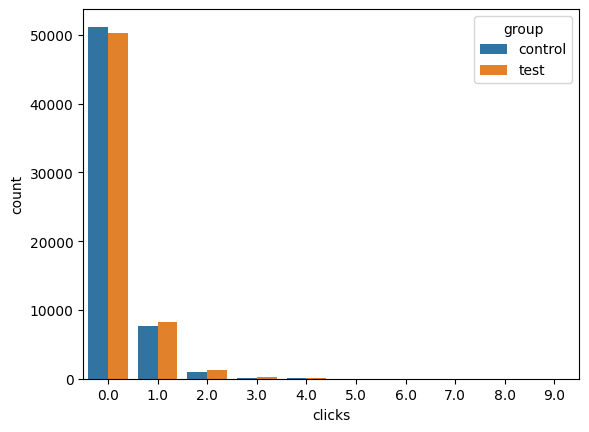

In [ ]:
sns.countplot(df, x = df.clicks, hue='group')

тестовая група чуть чаще проявляет активность , учитывая равномерное распредеоение групп. Количество кликов увеличивается в тестовой группе

##количество просмотров##

<Axes: ylabel='Density'>

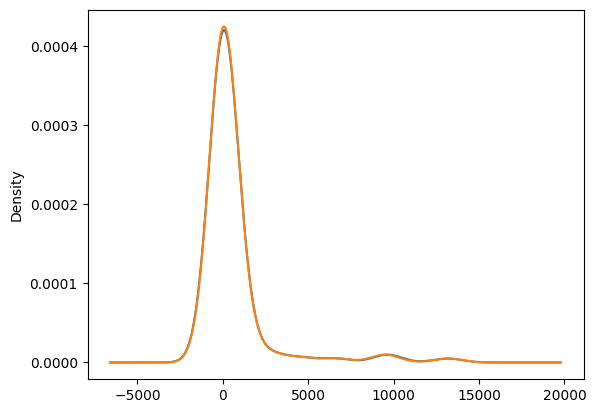

In [ ]:
df[df['group']=='control']['views'].value_counts().plot.density()
df[df['group']=='test']['views'].value_counts().plot.density()

графики накладываются друг на друга, значени распределены одинаково. Скорее всего тестовая и контрольная группа одинаковое количество раз просматривала сайт, просмотры не уменьшаются

#Зависимость кликов от просмотров#

In [ ]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

<Axes: xlabel='views', ylabel='clicks'>

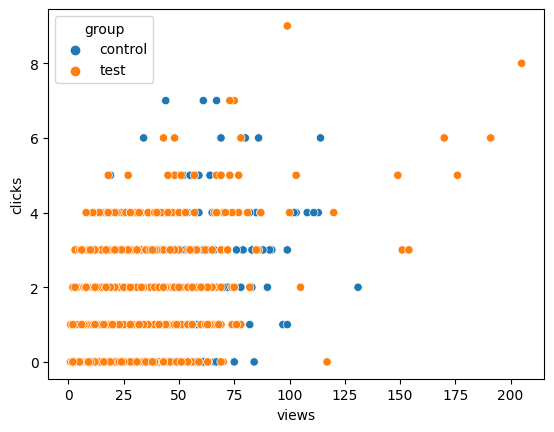

In [ ]:
sns.scatterplot(df, x='views', y='clicks', hue ='group')

с увеличением просмотров увеличиваются клики, у тестовой группы значение кликов от просмотров больше, чем у контрольной
